In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("IRIS.csv")
df.head(6)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [15]:
df.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(150, 5)

In [23]:
df["species"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
df["species"].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

df.iloc[::20]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
20,5.4,3.4,1.7,0.2,0
40,5.0,3.5,1.3,0.3,0
60,5.0,2.0,3.5,1.0,1
80,5.5,2.4,3.8,1.1,1
100,6.3,3.3,6.0,2.5,2
120,6.9,3.2,5.7,2.3,2
140,6.7,3.1,5.6,2.4,2


<Axes: >

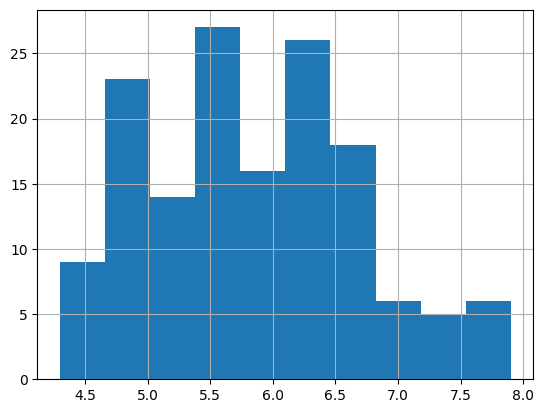

In [48]:
df["sepal_length"].hist()

<Axes: >

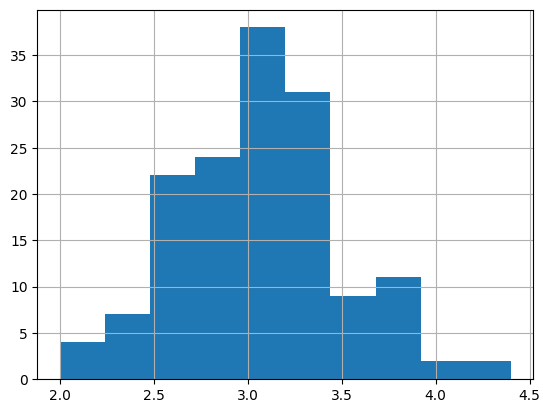

In [49]:
df["sepal_width"].hist()

<Axes: >

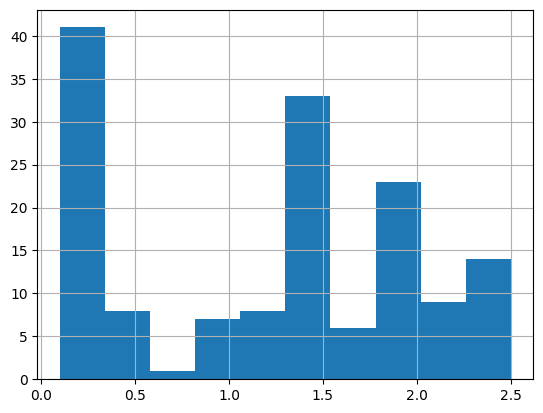

In [50]:
df["petal_width"].hist()

<Axes: >

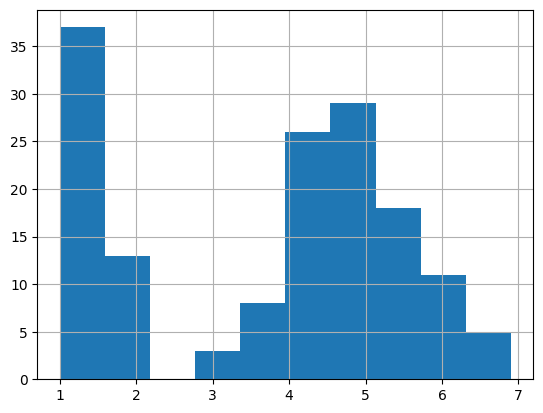

In [51]:
df["petal_length"].hist()

In [57]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
x = df[df['species'] == 0]
print(x.head())  # Check if this returns any data


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


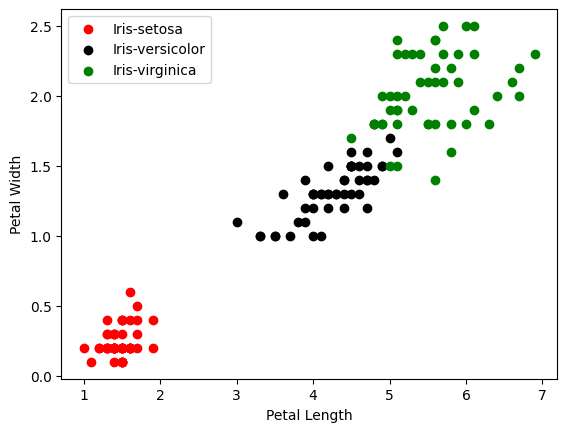

In [66]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['red','Black','green']

for i in range(3):
    x=df[df['species']==i]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

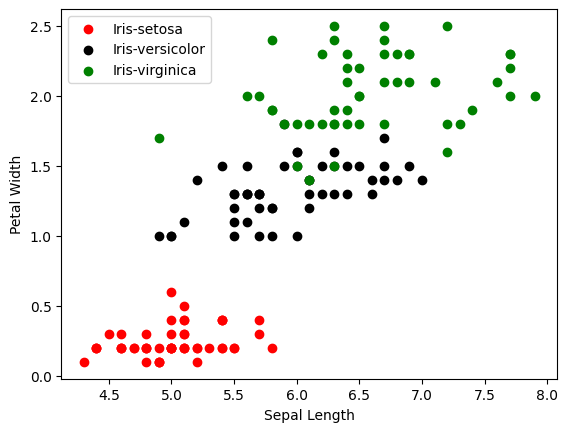

In [67]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['red','Black','green']

for i in range(3):
    x=df[df['species']==i]
    plt.scatter(x['sepal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

In [68]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

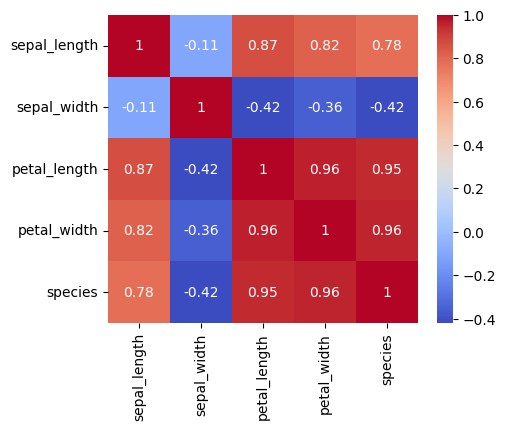

In [80]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

We are now going to train the data using two popular machine learining me

In [138]:
X = df.drop(columns=[ "species"])
Y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.40)

In [139]:
# USING KNN ALGORITHM 

model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test)*100,"%")

Accuracy:  96.66666666666667 %


In [140]:
# USING LOGISTIC REGRESSION

model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test)*100,"%")

Accuracy:  95.0 %


We have achived an accuracy of 95% from Logistic regression and 96.67% from using KNN algorithm!